In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import os# Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 

In [32]:
import seaborn as sns

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager, rc
font = 'Malgun Gothic'
plt.rcParams['font.family'] = font

In [34]:
import warnings
warnings.filterwarnings(action='ignore')

In [35]:
#현재 작업하는 위치
os.getcwd()

'C:\\Users\\User\\Dropbox\\2022_Program_Undergraduate\\ML_code\\Code\\test3_MLcode_all'

In [36]:
#csv 파일 불러오기
data = pd.read_excel('mydata.xlsx')

In [37]:
# data_C = pd.read_excel('Zone_FS_2016_C.xlsx')
# data_C=data[data['Year']>2017]

In [12]:
data.head()

,Date,count,age65up,Delta_count,Omicron_count,Delta_prop,Omicron_prop,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,...,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential,death,period
0,2020-02-15,0,0,0,0,0.0,0.0,-4,0,3,...,1,3,-8,0,2,-4,1,3,0,1
1,2020-02-16,2,2,0,0,0.0,0.0,-11,0,-31,...,-3,4,-15,0,-33,-16,-3,4,1,1
2,2020-02-17,0,0,0,0,0.0,0.0,-7,-6,-17,...,0,5,-9,-6,-17,-7,0,5,0,1
3,2020-02-18,2,0,0,0,0.0,0.0,-1,-3,-5,...,2,2,1,-2,-3,-1,2,2,0,1
4,2020-02-19,34,5,0,0,0.0,0.0,-5,-1,14,...,1,2,-7,-1,9,-5,2,2,3,1


In [38]:
data.columns

Index(['Date', 'count', 'age65up', 'Delta_count', 'Omicron_count',
       'Delta_prop', 'Omicron_prop', 'seoul_retail_recreation',
       'seoul_grocery_pharmacy', 'seoul_parks', 'seoul_transit_stations',
       'seoul_workplaces', 'seoul_residential', 'metro_retail_recreation',
       'metro_grocery_pharmacy', 'metro_parks', 'metro_transit_stations',
       'metro_workplaces', 'metro_residential', 'death', 'period'],
      dtype='object')

In [39]:
variables=['Delta_count', 'Omicron_count',
       'Delta_prop', 'Omicron_prop', 'seoul_retail_recreation',
       'seoul_grocery_pharmacy', 'seoul_parks', 'seoul_transit_stations',
       'seoul_workplaces', 'seoul_residential', 'metro_retail_recreation',
       'metro_grocery_pharmacy', 'metro_parks', 'metro_transit_stations',
       'metro_workplaces', 'metro_residential', 'death']

In [40]:
targets=['count']

In [41]:
data_FS_X=data[variables]

In [17]:
data_FS_Y=data[targets]

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scale_cols = ['R_p', 'R_t', '교회', '병원', '요양', '가족', '모임', '학교 및 교육', '운동',
#        '사우나', '유흥', '건물', '시설 및 직장', '집회', 'SG_sum_D', 'SG_sum']
data_FS_X = scaler.fit_transform(data_FS_X)
# data_FSC_X = scaler.fit_transform(data_FSC_X)

data_FS_X = pd.DataFrame(data_FS_X)
data_FS_X.columns = variables

# data_FSC_X = pd.DataFrame(data_FSC_X)
# data_FSC_X.columns = variables

In [19]:
data_FS_X.shape

(787, 17)

In [20]:
data_FS_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delta_count              787 non-null    float64
 1   Omicron_count            787 non-null    float64
 2   Delta_prop               787 non-null    float64
 3   Omicron_prop             787 non-null    float64
 4   seoul_retail_recreation  787 non-null    float64
 5   seoul_grocery_pharmacy   787 non-null    float64
 6   seoul_parks              787 non-null    float64
 7   seoul_transit_stations   787 non-null    float64
 8   seoul_workplaces         787 non-null    float64
 9   seoul_residential        787 non-null    float64
 10  metro_retail_recreation  787 non-null    float64
 11  metro_grocery_pharmacy   787 non-null    float64
 12  metro_parks              787 non-null    float64
 13  metro_transit_stations   787 non-null    float64
 14  metro_workplaces         7

In [21]:
data_FS_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   787 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


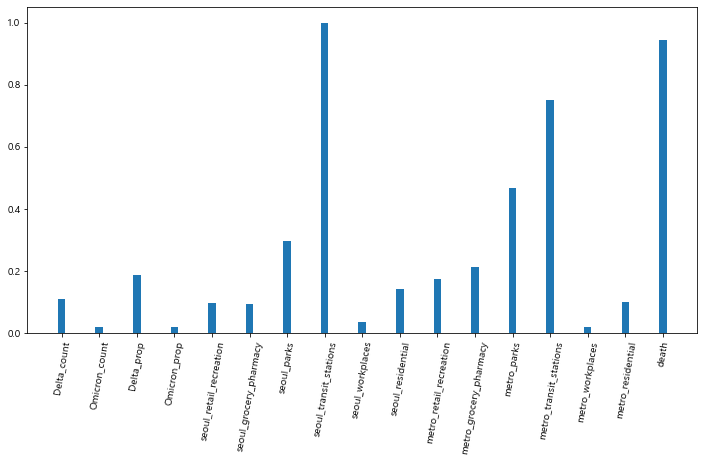

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# #############################################################################
# Some noisy data not correlated
# E = np.random.RandomState(42).uniform(0, 0.1, size=(data_FS_X.shape[0], 20))

# Add the noisy data to the informative features
# data_FS_X = np.hstack((data_FS_X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        data_FS_X, data_FS_Y, random_state=0
)

plt.figure(figsize=(12,6))


X_indices = data_FS_X.columns
# np.arange(data_FS_X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_regression, k=15)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
plt.xticks(rotation=80)

plt.show()

In [23]:
selector.pvalues_

array([1.36277382e-02, 4.41142713e-01, 7.23339129e-04, 4.62030559e-01,
       2.16047949e-02, 2.73626677e-02, 9.64677330e-06, 1.45525927e-17,
       2.59270694e-01, 3.84960109e-03, 1.15859835e-03, 2.44514656e-04,
       1.33412090e-08, 2.39206246e-13, 4.69435218e-01, 2.06062861e-02,
       1.28031624e-16])

In [24]:
D_C=pd.DataFrame()

In [25]:
D_C['variable']=variables

In [26]:
D_C['p_value']=selector.pvalues_

In [27]:
D_C

,variable,p_value
0,Delta_count,1.362774e-02
1,Omicron_count,4.411427e-01
2,Delta_prop,7.233391e-04
3,Omicron_prop,4.620306e-01
4,seoul_retail_recreation,2.160479e-02
5,seoul_grocery_pharmacy,2.736267e-02
6,seoul_parks,9.646773e-06
7,seoul_transit_stations,1.455259e-17
8,seoul_workplaces,2.592707e-01
9,seoul_residential,3.849601e-03


In [28]:
D_C[D_C['p_value']<0.05]

,variable,p_value
0,Delta_count,1.362774e-02
2,Delta_prop,7.233391e-04
4,seoul_retail_recreation,2.160479e-02
5,seoul_grocery_pharmacy,2.736267e-02
6,seoul_parks,9.646773e-06
7,seoul_transit_stations,1.455259e-17
9,seoul_residential,3.849601e-03
10,metro_retail_recreation,1.158598e-03
11,metro_grocery_pharmacy,2.445147e-04
12,metro_parks,1.334121e-08


#### 변수 선택 (Decision tree 이용)

In [29]:
# 변수 선택 
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
#from sklearn.gaussian_process import GaussianProcessRegressor
#GaussianProcessRegressor()
#from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor
#LinearRegression

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, data_FS_X, data_FS_Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(pipeline, data_FS_X, data_FS_Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

rfe.fit(data_FS_X, data_FS_Y)
# summarize all features
for i in range(data_FS_X.shape[1]):
    print('Column: %d, %s, Rank: %.3f' % (i, data_FS_X.columns[i], rfe.ranking_[i]))

MSE: -2343646711.975 (1596754688.184)
Column: 0, Delta_count, Rank: 10.000
Column: 1, Omicron_count, Rank: 12.000
Column: 2, Delta_prop, Rank: 3.000
Column: 3, Omicron_prop, Rank: 13.000
Column: 4, seoul_retail_recreation, Rank: 1.000
Column: 5, seoul_grocery_pharmacy, Rank: 4.000
Column: 6, seoul_parks, Rank: 2.000
Column: 7, seoul_transit_stations, Rank: 1.000
Column: 8, seoul_workplaces, Rank: 1.000
Column: 9, seoul_residential, Rank: 9.000
Column: 10, metro_retail_recreation, Rank: 11.000
Column: 11, metro_grocery_pharmacy, Rank: 5.000
Column: 12, metro_parks, Rank: 8.000
Column: 13, metro_transit_stations, Rank: 1.000
Column: 14, metro_workplaces, Rank: 6.000
Column: 15, metro_residential, Rank: 7.000
Column: 16, death, Rank: 1.000


>2 -4017078384.588 (2715789391.184)
>3 -2352746917.684 (1258415760.562)
>4 -2505479178.796 (1566151215.194)
>5 -2700831992.550 (1743605116.119)
>6 -3049115010.120 (1812966052.268)
>7 -2985108772.547 (1811339516.038)
>8 -3068941612.326 (2127551703.738)
>9 -3149431328.407 (1904025544.986)
>10 -3107608368.333 (2104268104.887)
>11 -2871612563.975 (2115601239.734)
>12 -3106535601.767 (2167325135.485)
>13 -2890577048.878 (1885786366.379)
>14 -3126066456.517 (2149339467.044)
>15 -3092929095.173 (1860047492.319)
>16 -3208877380.676 (1969903569.164)


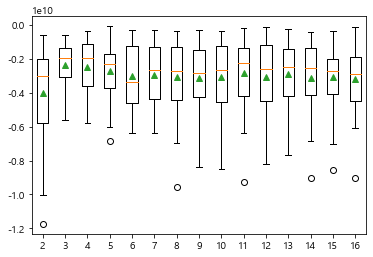

In [35]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, data_FS_X.shape[1]):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# # define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, data_FS_X, data_FS_Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

feature_number =  4
>DT -2372998316.622 (1731290834.915)
>rf -1425994630.663 (727923102.928)
>gbm -1402846771.916 (843002772.867)
>bt -1529735006.210 (847846776.925)
>MLP -5435939812.780 (3023493872.465)


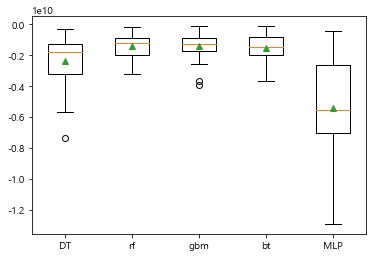

feature_number =  5
>DT -2653321101.892 (1757695408.257)
>rf -1409353772.987 (679032459.882)
>gbm -1387689227.934 (874830183.609)
>bt -1651752260.953 (766236445.817)
>MLP -5434989600.447 (3023088934.962)


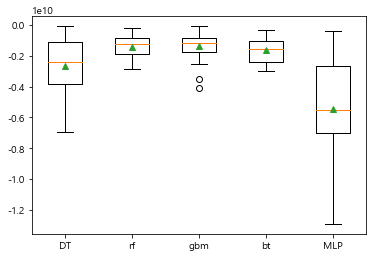

feature_number =  6
>DT -2642834366.376 (1734418268.124)
>rf -1371477743.412 (693587575.059)
>gbm -1218254741.265 (763050045.447)
>bt -1498049500.217 (825930498.313)
>MLP -5433199274.444 (3022450681.916)


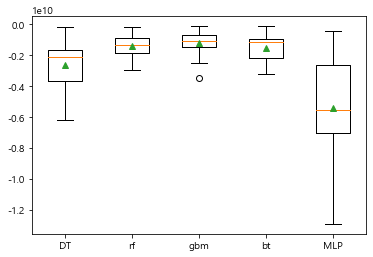

feature_number =  7
>DT -2916267546.634 (1848185530.789)
>rf -1358874047.057 (672705957.925)
>gbm -1288875393.777 (873610569.183)
>bt -1667364664.162 (846833237.716)
>MLP -5432390790.653 (3022171046.039)


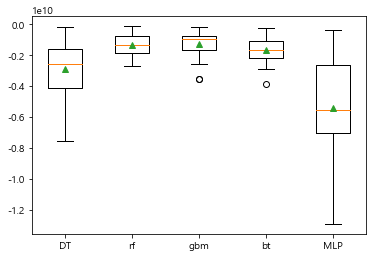

feature_number =  8
>DT -3150676073.681 (1848900464.084)
>rf -1368049538.469 (679749028.237)
>gbm -1236761347.987 (840684059.754)
>bt -1551384841.143 (804470540.921)
>MLP -5431672972.355 (3021809688.086)


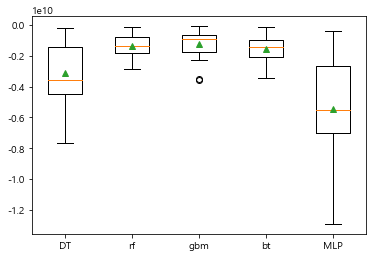

feature_number =  9
>DT -3390973868.512 (2061574730.987)
>rf -1393577928.654 (735833714.419)
>gbm -1192244316.362 (738512618.011)
>bt -1671539618.393 (880416187.635)
>MLP -5430597171.483 (3021535300.416)


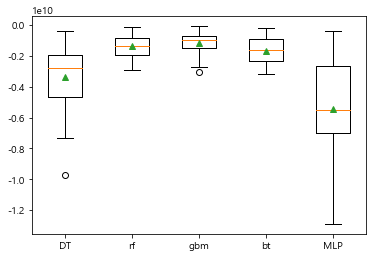

feature_number =  10
>DT -3348605710.240 (2159415326.150)
>rf -1407133699.342 (700007718.103)
>gbm -1244986437.239 (779610913.084)
>bt -1599702972.331 (761856861.142)
>MLP -5428679119.122 (3020476209.804)


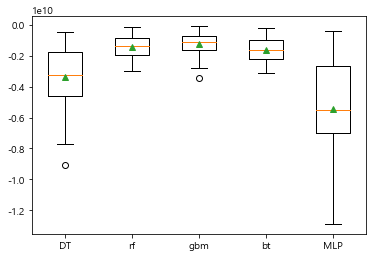

feature_number =  11
>DT -3081806837.097 (1887745701.690)
>rf -1466249257.213 (767198537.776)
>gbm -1206926841.840 (706759573.628)
>bt -1522096983.761 (820007726.862)
>MLP -5427408117.606 (3020310547.169)


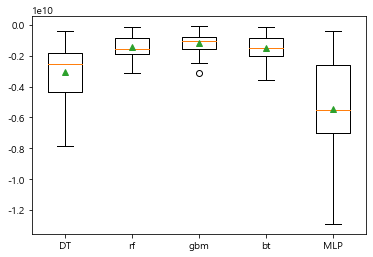

feature_number =  12
>DT -3072172787.202 (2166609116.853)
>rf -1378520976.036 (699876997.589)
>gbm -1237775723.816 (717980416.884)
>bt -1530135420.796 (820312388.912)
>MLP -5426623043.870 (3019582545.441)


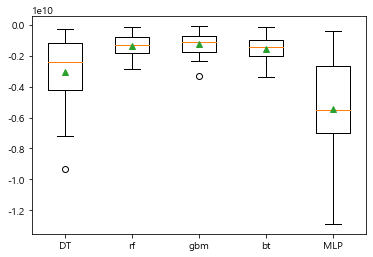

feature_number =  13
>DT -3028314526.084 (1884118532.343)
>rf -1438108589.454 (725716993.874)
>gbm -1227363737.382 (724716171.692)
>bt -1581610482.092 (813345640.588)
>MLP -5426350807.542 (3020230294.328)


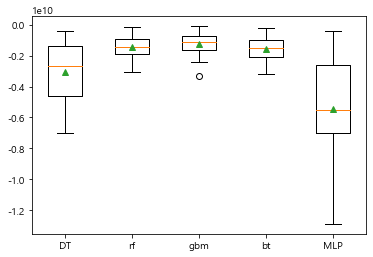

feature_number =  14
>DT -2978025696.607 (1934303229.062)
>rf -1450898612.902 (766127308.237)
>gbm -1213161923.205 (714783020.209)
>bt -1661809339.586 (1044727672.939)
>MLP -5426091961.695 (3020076723.693)


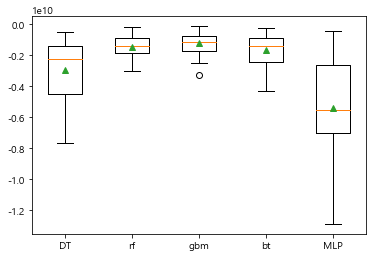

feature_number =  15
>DT -3145298500.543 (1753952377.209)
>rf -1450747164.682 (753466333.668)
>gbm -1264562447.824 (738673174.315)
>bt -1705413230.901 (913494242.740)
>MLP -5425203517.968 (3019214294.645)


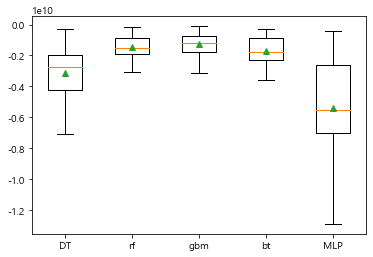

feature_number =  16
>DT -3426115193.442 (2288891606.360)
>rf -1410976681.958 (750123494.859)
>gbm -1221137498.501 (732700722.464)
>bt -1713377203.582 (837897608.097)
>MLP -5424682242.606 (3018773186.175)


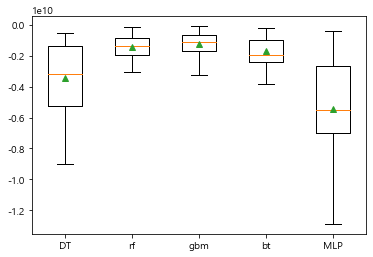

In [36]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
#def get_dataset():
  #  X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
  #  return X, y
 
# get a list of models to evaluate
def get_models(k_num):
    models = dict()
#     # SVC
#     rfe = RFE(estimator=LinearSVC(), n_features_to_select=k_num)
#     model = LinearSVC()
#     models['SVC'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=k_num)
    model = DecisionTreeRegressor()
    models['DT'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=k_num)
    model = RandomForestRegressor()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=k_num)
    model = GradientBoostingRegressor()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    # bt (Bagging tree)
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=k_num)
    model = BaggingRegressor(base_estimator=DecisionTreeRegressor())
    models['bt'] = Pipeline(steps=[('s',rfe),('m',model)])
    # MLP (multi-layer perceptron)
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=k_num)
    model = MLPRegressor()
    models['MLP'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
 
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# # define dataset
# X, y = get_dataset()
# get the models to evaluate
for k_num in range(4,data_FS_X.shape[1]):
    print('feature_number = ',k_num)
    models = get_models(k_num)
# evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, data_FS_X, data_FS_Y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()

In [39]:
data_FS_X=data_FS_X[variables]
data_FS_X

,Delta_count,Omicron_count,Delta_prop,Omicron_prop,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,seoul_transit_stations,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential,death
0,0.0,0.0,0.0,0.0,0.614286,0.160714,0.211268,0.645161,0.923913,0.176471,0.657534,0.285714,0.229592,0.761194,0.967033,0.138889,0.00000
1,0.0,0.0,0.0,0.0,0.514286,0.160714,0.051643,0.500000,0.880435,0.205882,0.561644,0.285714,0.051020,0.582090,0.923077,0.166667,0.00625
2,0.0,0.0,0.0,0.0,0.571429,0.107143,0.117371,0.645161,0.913043,0.235294,0.643836,0.224490,0.132653,0.716418,0.956044,0.194444,0.00000
3,0.0,0.0,0.0,0.0,0.657143,0.133929,0.173709,0.693548,0.934783,0.147059,0.780822,0.265306,0.204082,0.805970,0.978022,0.111111,0.00000
4,0.0,0.0,0.0,0.0,0.600000,0.151786,0.262911,0.677419,0.923913,0.147059,0.671233,0.275510,0.265306,0.746269,0.978022,0.111111,0.01875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.0,0.0,0.0,0.0,0.585714,0.232143,0.305164,0.483871,0.989130,0.117647,0.561644,0.306122,0.316327,0.567164,0.989011,0.138889,0.18125
783,0.0,0.0,0.0,0.0,0.600000,0.285714,0.328638,0.548387,0.978261,0.117647,0.589041,0.346939,0.362245,0.626866,0.967033,0.138889,0.00000
784,0.0,0.0,0.0,0.0,0.671429,0.321429,0.394366,0.548387,0.880435,0.147059,0.630137,0.367347,0.433673,0.641791,0.879121,0.111111,0.00000
785,0.0,0.0,0.0,0.0,0.800000,0.285714,0.483568,0.629032,0.858696,0.117647,0.767123,0.316327,0.596939,0.701493,0.868132,0.055556,0.00000


In [40]:
FI_C=pd.DataFrame(columns={'Feature'})
FI_C['Feature']=data_FS_X.columns

In [41]:
# explore the algorithm wrapped by RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
fit_num=1
for i in range(fit_num):

    GBR_clf= GradientBoostingRegressor()

    GBR_clf.fit(data_FS_X, data_FS_Y)
    feature_importance = GBR_clf.feature_importances_
    
    temp=pd.DataFrame(columns={'Feature'})
    temp['Feature']=data_FS_X.columns
    temp['Feature Importance']=feature_importance 
    
    
    FI_C['Simulation_'+ str(i)]=feature_importance

In [42]:
for i in range(len(FI_C)):
    FI_C.loc[i,'mean']=FI_C.loc[i,FI_C.columns[1:]].mean()

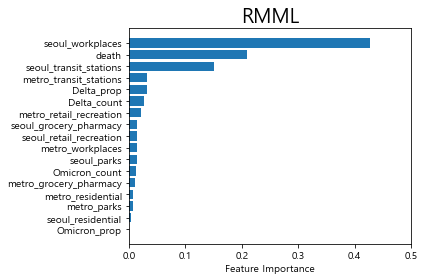

In [43]:
feature_importance=FI_C['mean']
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_FS_X.columns)[sorted_idx])
plt.xlim([0, 0.5])
plt.xlabel('Feature Importance')
plt.rc('axes', titlesize=20)
plt.title('RMML')
# plt.text(-0.15, 8, 'A', fontdict=font2)
plt.rcParams['font.family'] = 'Arial'
plt.tight_layout()
plt.show()